<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/1.%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_(Bayesian_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Байесовский классификатор (Bayesian Classifier)

## Введение

Байесовский классификатор — это статистический метод классификации, основанный на теореме Байеса. Этот алгоритм широко используется в задачах машинного обучения и обработки данных для предсказания вероятности принадлежности объекта к определенному классу на основе доступных признаков.

Основная идея заключается в том, чтобы оценить вероятность того, что объект относится к тому или иному классу, учитывая наблюдаемые данные. Байесовские классификаторы могут быть как простыми, так и сложными, в зависимости от предположений о распределении данных.



## 1. Теорема Байеса

Для начала давайте вспомним формулировку теоремы Байеса:

$$
P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}
$$

где:
- $P(C_k | X)$ — апостериорная вероятность того, что объект $X$ принадлежит классу $C_k$, при условии наблюдения признаков $X$.
- $P(X | C_k)$ — вероятность наблюдения признаков $X$, если объект принадлежит классу $C_k$ (правдоподобие).
- $P(C_k)$ — априорная вероятность класса $C_k$ (вероятность того, что объект принадлежит классу $C_k$ до наблюдения признаков).
- $P(X)$ — вероятность наблюдения признаков $X$ (нормализующий множитель).

Целью байесовского классификатора является максимизация апостериорной вероятности $P(C_k | X)$ для каждого класса $C_k$. Это можно записать как:

$$
\hat{C} = \arg\max_{C_k} P(C_k | X)
$$

Используя теорему Байеса, эту задачу можно переписать как:

$$
\hat{C} = \arg\max_{C_k} \frac{P(X | C_k) P(C_k)}{P(X)}
$$

Так как знаменатель $P(X)$ не зависит от класса $C_k$, его можно исключить из расчета, и задача сводится к максимизации числителя:

$$
\hat{C} = \arg\max_{C_k} P(X | C_k) P(C_k)
$$



### 4. **Наивный байесовский классификатор (Naive Bayes Classifier)**

#### Основная идея
Наивный байесовский классификатор основывается на предположении о независимости признаков. Это значит, что вероятность наблюдения всех признаков объекта $X = (x_1, x_2, ..., x_n)$ может быть представлена как произведение вероятностей отдельных признаков:

$$
P(X | C_k) = P(x_1 | C_k) \cdot P(x_2 | C_k) \cdot ... \cdot P(x_n | C_k) = \prod_{i=1}^n P(x_i | C_k)
$$

Подставляя это выражение в формулу байесовского классификатора:

$$
\hat{C} = \arg\max_{C_k} \left( \prod_{i=1}^n P(x_i | C_k) \right) P(C_k)
$$

Здесь:
- $\prod_{i=1}^n P(x_i | C_k)$ — правдоподобие, т.е. вероятность наблюдения каждого признака $x_i$ при условии, что объект принадлежит классу $C_k$.
- $P(C_k)$ — априорная вероятность класса $C_k$.

#### Почему возникает проблема с произведением маленьких чисел?
При вычислении произведения вероятностей $P(x_i | C_k)$, каждое из этих значений обычно является числом меньше единицы. При умножении нескольких таких маленьких чисел результат стремится к нулю, что может привести к числовой нестабильности. Чтобы избежать этой проблемы, мы переходим к логарифмической шкале.



### 4.1 **Логарифмическая форма для стабильности**

Вместо работы с произведением вероятностей, можно взять логарифм от целевой функции. Логарифм преобразует произведение в сумму:

$$
\log \left( \prod_{i=1}^n P(x_i | C_k) \right) = \sum_{i=1}^n \log P(x_i | C_k)
$$

Таким образом, задача максимизации становится:

$$
\hat{C} = \arg\max_{C_k} \left( \sum_{i=1}^n \log P(x_i | C_k) + \log P(C_k) \right)
$$

Здесь:
- $\sum_{i=1}^n \log P(x_i | C_k)$ — сумма логарифмов правдоподобий.
- $\log P(C_k)$ — логарифм априорной вероятности класса $C_k$.

Это преобразование не только делает вычисления более стабильными, но и упрощает работу с большими наборами данных.


### 4.2 **Как максимизировать?**

Цель наивного байесовского классификатора — найти класс $C_k$, который максимизирует апостериорную вероятность $P(C_k | X)$. Поскольку знаменатель $P(X)$ одинаков для всех классов, его можно исключить из расчета, и задача сводится к максимизации числителя:

$$
\hat{C} = \arg\max_{C_k} \left( \prod_{i=1}^n P(x_i | C_k) \right) P(C_k)
$$

Или в логарифмической форме:

$$
\hat{C} = \arg\max_{C_k} \left( \sum_{i=1}^n \log P(x_i | C_k) + \log P(C_k) \right)
$$

#### Шаги для максимизации:
1. **Оценка правдоподобия $P(x_i | C_k)$**:
   Для каждого признака $x_i$ и каждого класса $C_k$ нужно оценить вероятность $P(x_i | C_k)$. Это зависит от типа данных:
   - Для непрерывных признаков: используется нормальное распределение.
   - Для дискретных признаков: используются мультиномиальные или бернуллиевские модели.

2. **Оценка априорной вероятности $P(C_k)$**:
   Априорная вероятность класса $C_k$ оценивается как доля объектов этого класса в обучающей выборке:

   $$
   P(C_k) = \frac{\text{количество объектов класса } C_k}{\text{общее количество объектов}}
   $$

3. **Вычисление суммы логарифмов**:
   Для каждого класса $C_k$ вычисляем сумму:

   $$
   S_k = \sum_{i=1}^n \log P(x_i | C_k) + \log P(C_k)
   $$

4. **Выбор класса с максимальным значением**:
   Класс, для которого значение $S_k$ наибольшее, выбирается как предсказанный класс:

   $$
   \hat{C} = \arg\max_{C_k} S_k
   $$



### 4.3 **Пример максимизации**

Предположим, что у нас есть два класса $C_1$ и $C_2$, и объект $X = (x_1, x_2)$ с двумя признаками. Мы хотим определить, к какому классу относится объект.

#### Данные:
- Априорные вероятности: $P(C_1) = 0.6$, $P(C_2) = 0.4$.
- Правдоподобия для $x_1$:
  - $P(x_1 | C_1) = 0.8$, $P(x_1 | C_2) = 0.3$.
- Правдоподобия для $x_2$:
  - $P(x_2 | C_1) = 0.7$, $P(x_2 | C_2) = 0.5$.

#### Вычисления:
1. Для класса $C_1$:
   $$
   S_1 = \log P(x_1 | C_1) + \log P(x_2 | C_1) + \log P(C_1)
   $$
   $$
   S_1 = \log(0.8) + \log(0.7) + \log(0.6) \approx -0.223 - 0.357 - 0.511 = -1.091
   $$

2. Для класса $C_2$:
   $$
   S_2 = \log P(x_1 | C_2) + \log P(x_2 | C_2) + \log P(C_2)
   $$
   $$
   S_2 = \log(0.3) + \log(0.5) + \log(0.4) \approx -1.204 - 0.693 - 0.916 = -2.813
   $$

#### Результат:
Класс $C_1$ имеет большее значение $S_1 = -1.091$, чем $S_2 = -2.813$. Следовательно, объект $X$ классифицируется как принадлежащий классу $C_1$.


### 4.4 **Минимизация ошибок**

Хотя основная цель наивного байесовского классификатора — максимизация апостериорной вероятности, важно помнить, что минимизация ошибок достигается через правильное обучение модели. Это включает:
- Тщательную оценку вероятностей $P(x_i | C_k)$ и $P(C_k)$.
- Обработку отсутствующих данных (например, использование сглаживания).
- Учет ограничений данных (например, проверка предположения о независимости признаков).

Если предположение о независимости признаков сильно нарушено, качество классификации может ухудшиться. В таких случаях стоит рассмотреть более сложные модели, такие как байесовские сети.


## 3. Распределения признаков

В наивном байесовском классификаторе необходимо задать вероятностные распределения для каждого признака $x_i$ в каждом классе $C_k$. Обычно используются следующие типы распределений:

### 3.1 Гауссовский (нормальный) байесовский классификатор
Если признаки являются непрерывными величинами, их распределение часто аппроксимируют нормальным законом:

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{ik}^2}} \exp\left(-\frac{(x_i - \mu_{ik})^2}{2\sigma_{ik}^2}\right)
$$

где:
- $\mu_{ik}$ — среднее значение признака $x_i$ в классе $C_k$,
- $\sigma_{ik}^2$ — дисперсия признака $x_i$ в классе $C_k$.

### 3.2 Мультиномиальный байесовский классификатор
Используется для дискретных признаков, таких как частоты слов в тексте. Вероятность признака $x_i$ в классе $C_k$ определяется как:

$$
P(x_i | C_k) = \frac{\text{частота появления } x_i \text{ в классе } C_k}{\text{общее количество признаков в классе } C_k}
$$

### 3.3 Бернуллиевский байесовский классификатор
Применяется для бинарных признаков (например, наличие/отсутствие слова). Вероятность признака $x_i$ в классе $C_k$ определяется как:

$$
P(x_i = 1 | C_k) = p_{ik}, \quad P(x_i = 0 | C_k) = 1 - p_{ik}
$$

где $p_{ik}$ — вероятность того, что признак $x_i$ равен 1 в классе $C_k$.



## 4. Алгоритм обучения

Обучение байесовского классификатора состоит из двух этапов:
1. **Оценка априорных вероятностей** $P(C_k)$:
   Априорная вероятность класса $C_k$ оценивается как доля объектов этого класса в обучающей выборке:

   $$
   P(C_k) = \frac{\text{количество объектов класса } C_k}{\text{общее количество объектов}}
   $$

2. **Оценка правдоподобия** $P(x_i | C_k)$:
   Для каждого признака $x_i$ и каждого класса $C_k$ оценивается вероятность $P(x_i | C_k)$, используя соответствующее распределение (гауссовское, мультиномиальное или бернуллиевское).



## 5. Пример применения

Рассмотрим задачу классификации спама в электронной почте. Данные представлены в виде текстов писем, и задача заключается в определении, является ли письмо спамом ($C_1$) или нет ($C_2$).

1. **Предобработка данных**: Каждое письмо представляется как вектор частот слов.
2. **Обучение**: Оцениваются априорные вероятности $P(C_1)$ и $P(C_2)$, а также вероятности появления каждого слова в каждом классе ($P(x_i | C_1)$ и $P(x_i | C_2)$).
3. **Классификация**: Для нового письма вычисляется апостериорная вероятность для каждого класса, и выбирается класс с максимальной вероятностью.



## 6. Преимущества и недостатки

### Преимущества:
- Простота реализации.
- Эффективность на малых выборках.
- Интерпретируемость результатов.
- Работает с различными типами данных (текст, числа, категории).

### Недостатки:
- Предположение о независимости признаков может быть неверным.
- Чувствителен к шуму в данных.
- Требует корректной оценки вероятностей.



## 7. Заключение

Байесовский классификатор — мощный инструмент для решения задач классификации. Его основное преимущество заключается в использовании теоремы Байеса для учета априорной информации о классах. Хотя наивный байесовский классификатор делает строгое предположение о независимости признаков, он показывает хорошие результаты в различных приложениях, таких как фильтрация спама, распознавание текста и анализ данных.

Если вы хотите углубиться в тему, рекомендуется изучить более сложные модели, такие как байесовские сети (Bayesian Networks), которые позволяют учитывать зависимости между признаками.

$$
\boxed{\text{Байесовский классификатор — это базовый инструмент для статистической классификации.}}
$$


Давайте разберем конкретные числовые примеры для каждого раздела лекции, чтобы сделать материал более понятным.



### **1. Теорема Байеса: Пример**

#### Задача:
Предположим, что у нас есть тест на определение болезни. Известно:
- Вероятность того, что человек болен ($P(C)$), равна 0.01 (1%).
- Если человек болен, тест показывает положительный результат с вероятностью 0.99 ($P(T=+ | C)$).
- Если человек здоров, тест показывает ложноположительный результат с вероятностью 0.05 ($P(T=+ | \neg C)$).

Какова вероятность того, что человек действительно болен, если тест дал положительный результат?

#### Решение:
Используем теорему Байеса:
$$
P(C | T=+) = \frac{P(T=+ | C) P(C)}{P(T=+)}
$$

Сначала найдем $P(T=+)$ — общую вероятность положительного результата теста:
$$
P(T=+) = P(T=+ | C) P(C) + P(T=+ | \neg C) P(\neg C)
$$
$$
P(T=+) = (0.99)(0.01) + (0.05)(0.99) = 0.0099 + 0.0495 = 0.0594
$$

Теперь подставляем в формулу:
$$
P(C | T=+) = \frac{(0.99)(0.01)}{0.0594} = \frac{0.0099}{0.0594} \approx 0.1667
$$

**Ответ**: Вероятность того, что человек действительно болен, составляет около 16.7%.



### **2. Наивный байесовский классификатор: Пример**

#### Задача:
У нас есть задача классификации спама. Каждое письмо описывается двумя признаками:
- Наличие слова "победа" ($x_1$),
- Наличие слова "деньги" ($x_2$).

Известно:
- Априорная вероятность спама ($P(C=\text{spam})$) = 0.7,
- Априорная вероятность неспама ($P(C=\text{not spam})$) = 0.3.

Вероятности признаков для спама:
- $P(x_1 = 1 | \text{spam}) = 0.8$, $P(x_1 = 0 | \text{spam}) = 0.2$,
- $P(x_2 = 1 | \text{spam}) = 0.6$, $P(x_2 = 0 | \text{spam}) = 0.4$.

Вероятности признаков для неспама:
- $P(x_1 = 1 | \text{not spam}) = 0.1$, $P(x_1 = 0 | \text{not spam}) = 0.9$,
- $P(x_2 = 1 | \text{not spam}) = 0.2$, $P(x_2 = 0 | \text{not spam}) = 0.8$.

Классифицируйте письмо, содержащее слова "победа" и "деньги" ($x_1 = 1$, $x_2 = 1$).

#### Решение:
Вычислим апостериорные вероятности для обоих классов.

1. Для спама:
$$
P(C=\text{spam} | x_1=1, x_2=1) \propto P(x_1=1 | \text{spam}) P(x_2=1 | \text{spam}) P(\text{spam})
$$
$$
P(C=\text{spam} | x_1=1, x_2=1) \propto (0.8)(0.6)(0.7) = 0.336
$$

2. Для неспама:
$$
P(C=\text{not spam} | x_1=1, x_2=1) \propto P(x_1=1 | \text{not spam}) P(x_2=1 | \text{not spam}) P(\text{not spam})
$$
$$
P(C=\text{not spam} | x_1=1, x_2=1) \propto (0.1)(0.2)(0.3) = 0.006
$$

Нормализуем вероятности:
$$
P(C=\text{spam} | x_1=1, x_2=1) = \frac{0.336}{0.336 + 0.006} \approx 0.982
$$
$$
P(C=\text{not spam} | x_1=1, x_2=1) = \frac{0.006}{0.336 + 0.006} \approx 0.018
$$

**Ответ**: Письмо классифицируется как спам с вероятностью 98.2%.



### **3. Распределения признаков: Пример**

#### Гауссовский байесовский классификатор:
Предположим, что мы хотим классифицировать объекты по их весу ($x_1$) и росту ($x_2$). У нас два класса: "человек" и "робот".

Для класса "человек":
- Средний вес ($\mu_{1,\text{человек}}$) = 70 кг, дисперсия ($\sigma_{1,\text{человек}}^2$) = 25,
- Средний рост ($\mu_{2,\text{человек}}$) = 170 см, дисперсия ($\sigma_{2,\text{человек}}^2$) = 64.

Для класса "робот":
- Средний вес ($\mu_{1,\text{робот}}$) = 100 кг, дисперсия ($\sigma_{1,\text{робот}}^2$) = 49,
- Средний рост ($\mu_{2,\text{робот}}$) = 200 см, дисперсия ($\sigma_{2,\text{робот}}^2$) = 100.

Априорные вероятности:
- $P(C=\text{человек}) = 0.6$,
- $P(C=\text{робот}) = 0.4$.

Классифицируем объект с весом 80 кг и ростом 180 см.

#### Решение:
Вычислим правдоподобия для обоих классов.

1. Для "человека":
$$
P(x_1=80 | \text{человек}) = \frac{1}{\sqrt{2\pi(25)}} \exp\left(-\frac{(80-70)^2}{2(25)}\right) \approx 0.054
$$
$$
P(x_2=180 | \text{человек}) = \frac{1}{\sqrt{2\pi(64)}} \exp\left(-\frac{(180-170)^2}{2(64)}\right) \approx 0.06
$$
$$
P(C=\text{человек} | x_1=80, x_2=180) \propto (0.054)(0.06)(0.6) \approx 0.001944
$$

2. Для "робота":
$$
P(x_1=80 | \text{робот}) = \frac{1}{\sqrt{2\pi(49)}} \exp\left(-\frac{(80-100)^2}{2(49)}\right) \approx 0.014
$$
$$
P(x_2=180 | \text{робот}) = \frac{1}{\sqrt{2\pi(100)}} \exp\left(-\frac{(180-200)^2}{2(100)}\right) \approx 0.024
$$
$$
P(C=\text{робот} | x_1=80, x_2=180) \propto (0.014)(0.024)(0.4) \approx 0.0001344
$$

Нормализуем вероятности:
$$
P(C=\text{человек} | x_1=80, x_2=180) = \frac{0.001944}{0.001944 + 0.0001344} \approx 0.934
$$
$$
P(C=\text{робот} | x_1=80, x_2=180) = \frac{0.0001344}{0.001944 + 0.0001344} \approx 0.066
$$

**Ответ**: Объект классифицируется как "человек" с вероятностью 93.4%.



Эти примеры демонстрируют практическое применение теоремы Байеса и наивного байесовского классификатора.


Давайте реализуем примеры из предыдущего ответа на Python с визуализацией. Для этого мы будем использовать библиотеки `numpy`, `matplotlib` и `scipy`.



### **Пример 1: Теорема Байеса (Тест на болезнь)**

#### Код:


Вероятность того, что человек действительно болен: 16.67%


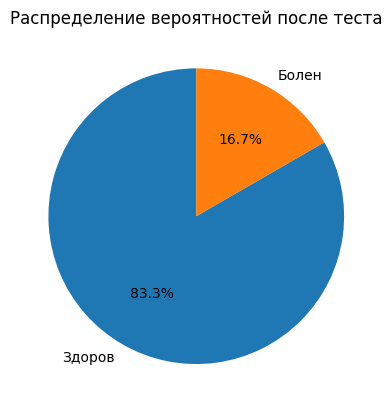

In [1]:
import matplotlib.pyplot as plt

# Вводные данные
P_C = 0.01  # Вероятность того, что человек болен
P_T_given_C = 0.99  # Вероятность положительного теста при болезни
P_T_given_not_C = 0.05  # Вероятность ложноположительного теста

# Вычисление P(T=+)
P_T = P_T_given_C * P_C + P_T_given_not_C * (1 - P_C)

# Вычисление P(C | T=+)
P_C_given_T = (P_T_given_C * P_C) / P_T

# Вывод результата
print(f"Вероятность того, что человек действительно болен: {P_C_given_T:.2%}")

# Визуализация
labels = ['Здоров', 'Болен']
values = [1 - P_C_given_T, P_C_given_T]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Распределение вероятностей после теста")
plt.show()



### **Пример 2: Наивный байесовский классификатор (Спам-фильтр)**

#### Код:




Вероятность спама: 98.25%
Вероятность неспама: 1.75%


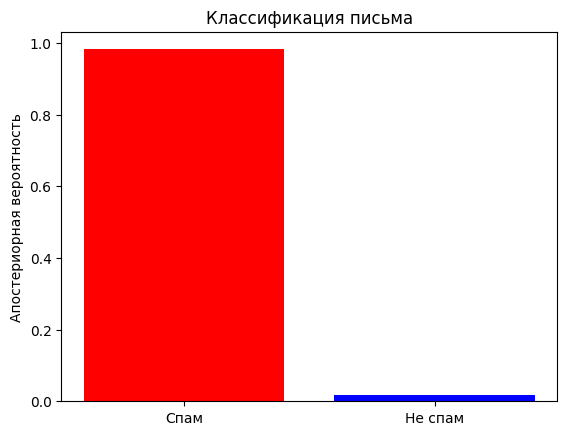

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Априорные вероятности
P_spam = 0.7
P_not_spam = 0.3

# Условные вероятности для спама
P_x1_1_given_spam = 0.8
P_x2_1_given_spam = 0.6

# Условные вероятности для неспама
P_x1_1_given_not_spam = 0.1
P_x2_1_given_not_spam = 0.2

# Вычисление правдоподобий
P_spam_given_x = P_x1_1_given_spam * P_x2_1_given_spam * P_spam
P_not_spam_given_x = P_x1_1_given_not_spam * P_x2_1_given_not_spam * P_not_spam

# Нормализация
total = P_spam_given_x + P_not_spam_given_x
P_spam_given_x /= total
P_not_spam_given_x /= total

# Вывод результатов
print(f"Вероятность спама: {P_spam_given_x:.2%}")
print(f"Вероятность неспама: {P_not_spam_given_x:.2%}")

# Визуализация
labels = ['Спам', 'Не спам']
values = [P_spam_given_x, P_not_spam_given_x]
plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Апостериорная вероятность')
plt.title('Классификация письма')
plt.show()



### **Пример 3: Гауссовский байесовский классификатор**

#### Код:



Вероятность человека: 98.61%
Вероятность робота: 1.39%


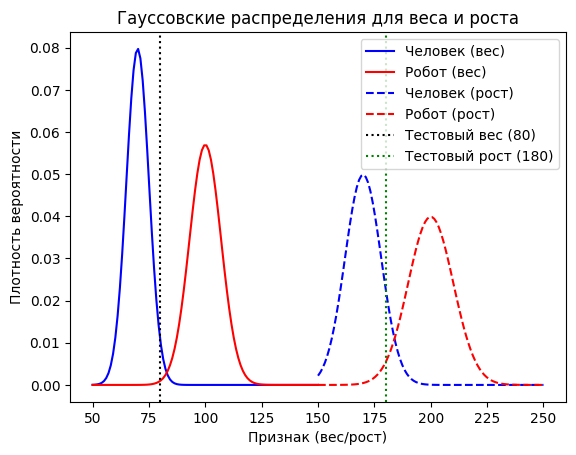

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметры распределений
mu_human_weight, sigma_human_weight = 70, 5
mu_robot_weight, sigma_robot_weight = 100, 7

mu_human_height, sigma_human_height = 170, 8
mu_robot_height, sigma_robot_height = 200, 10

# Априорные вероятности
P_human = 0.6
P_robot = 0.4

# Тестовый объект
x_weight = 80
x_height = 180

# Вычисление правдоподобий
P_weight_given_human = norm.pdf(x_weight, mu_human_weight, sigma_human_weight)
P_weight_given_robot = norm.pdf(x_weight, mu_robot_weight, sigma_robot_weight)

P_height_given_human = norm.pdf(x_height, mu_human_height, sigma_human_height)
P_height_given_robot = norm.pdf(x_height, mu_robot_height, sigma_robot_height)

# Вычисление апостериорных вероятностей
P_human_given_x = P_weight_given_human * P_height_given_human * P_human
P_robot_given_x = P_weight_given_robot * P_height_given_robot * P_robot

# Нормализация
total = P_human_given_x + P_robot_given_x
P_human_given_x /= total
P_robot_given_x /= total

# Вывод результатов
print(f"Вероятность человека: {P_human_given_x:.2%}")
print(f"Вероятность робота: {P_robot_given_x:.2%}")

# Визуализация распределений
x = np.linspace(50, 150, 100)
plt.plot(x, norm.pdf(x, mu_human_weight, sigma_human_weight), label='Человек (вес)', color='blue')
plt.plot(x, norm.pdf(x, mu_robot_weight, sigma_robot_weight), label='Робот (вес)', color='red')

x = np.linspace(150, 250, 100)
plt.plot(x, norm.pdf(x, mu_human_height, sigma_human_height), label='Человек (рост)', linestyle='--', color='blue')
plt.plot(x, norm.pdf(x, mu_robot_height, sigma_robot_height), label='Робот (рост)', linestyle='--', color='red')

plt.axvline(x_weight, color='black', linestyle=':', label=f'Тестовый вес ({x_weight})')
plt.axvline(x_height, color='green', linestyle=':', label=f'Тестовый рост ({x_height})')

plt.legend()
plt.title('Гауссовские распределения для веса и роста')
plt.xlabel('Признак (вес/рост)')
plt.ylabel('Плотность вероятности')
plt.show()